# Kleiner Test

In [48]:
from n2 import ConnectGene, NodeGene, NodeTypes, Individuum, reset_markings
import numpy as np
import gymnasium as gym
import random
from tqdm import tqdm
from IPython.display import clear_output

In [49]:
def simplest_ind(n_inputs, n_outputs, bias=False):
    node_genes = []
    connect_genes = []
    for i in range(n_inputs):
        node_genes.append(NodeGene(NodeTypes.Input, len(node_genes)))
    for i in range(n_outputs):
        node_genes.append(NodeGene(NodeTypes.Output, 1000))
    if bias:
        node_genes.append(NodeGene(NodeTypes.Bias, len(node_genes)))
        
    for i in range(n_inputs):
        for j in range(n_outputs):
            connect_genes.append(ConnectGene(node_genes[i].marking, node_genes[j+n_inputs].marking, np.random.uniform(low=-1, high=1)))
    return Individuum(node_genes, connect_genes)

In [50]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 1.0,
    'node': 0.0
}
MUTATE_BIG = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.3,
    'node': 0.03
}

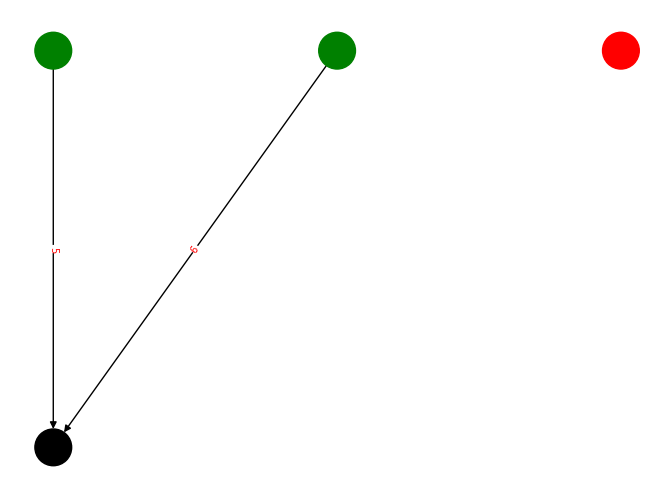

In [51]:
ind = simplest_ind(2, 1, bias=True)
ind.plot()

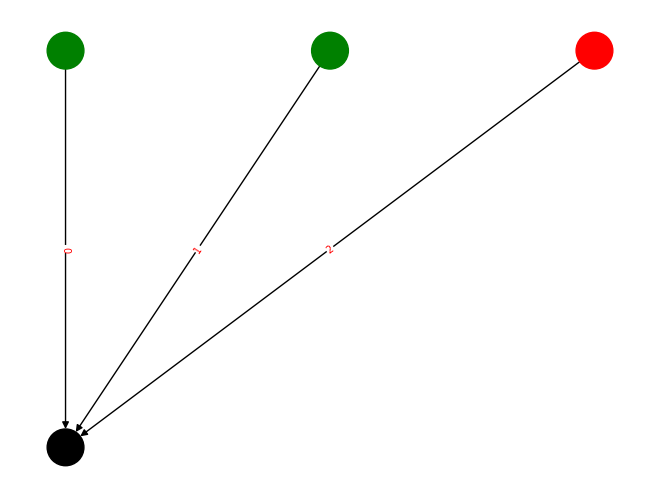

In [5]:
ind.mutate(MUTATE_SMALL)
ind.plot()

In [6]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

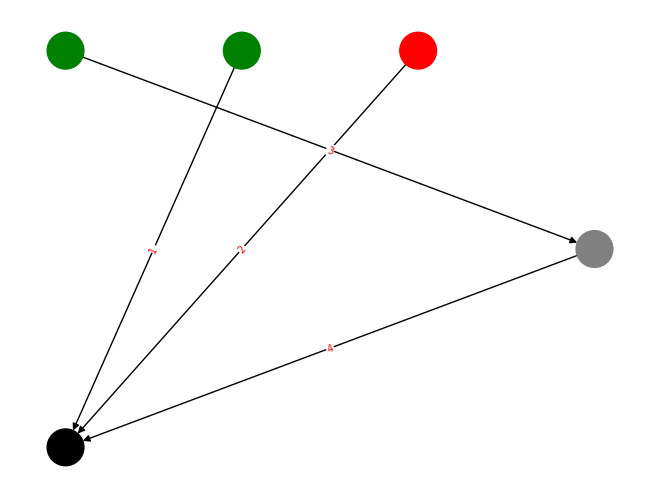

In [7]:
ind.mutate(MUTATE_SMALL)
ind.plot()

In [8]:
ind.printsum()

Node: 0
Node: 1
Node: 3
Node: 4
Node: 100
Connect: 0
In Node: 0
Out Node: 100
Weight: 0.459772096292295
Disabled: True

Connect: 1
In Node: 1
Out Node: 100
Weight: -0.35510816784441057
Disabled: False

Connect: 2
In Node: 3
Out Node: 100
Weight: 0.3969482221461101
Disabled: False

Connect: 3
In Node: 0
Out Node: 4
Weight: 1.3142217301233288
Disabled: False

Connect: 4
In Node: 4
Out Node: 100
Weight: -0.41275873274618075
Disabled: False



In [9]:
inp = np.array([[0,0],[0,1],[1,0],[1,1]])
out = np.array([[0],[1],[1],[0]])

def fitness(ind: Individuum):
    ind.fitness = 0
    for i,o in zip(inp,out):
        raw = ind.forward(i)
        ind.fitness -= (raw - o) ** 2
    return ind.fitness

In [10]:
print([ind.forward(inp[i]) for i in range(4)])
print(fitness(ind))

[array([0.71877899]), array([0.3078401]), array([0.48132962]), array([0.13903049])]
[-1.28407701]


In [11]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

In [54]:
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_SMALL)
dad.printsum()

mom
Node: 0
Node: 1
Node: 3
Node: 100
Connect: 0
In Node: 0
Out Node: 100
Weight: 0.76667010699659
Disabled: False

Connect: 1
In Node: 1
Out Node: 100
Weight: 0.7224778918433044
Disabled: False

dad
Node: 0
Node: 1
Node: 3
Node: 100
Connect: 0
In Node: 0
Out Node: 100
Weight: 0.76667010699659
Disabled: False

Connect: 1
In Node: 1
Out Node: 100
Weight: 0.7224778918433044
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 3
Node: 4
Node: 100
Connect: 0
In Node: 0
Out Node: 100
Weight: 0.6516041082346646
Disabled: True

Connect: 1
In Node: 1
Out Node: 100
Weight: 0.6340065548211139
Disabled: False

Connect: 3
In Node: 0
Out Node: 4
Weight: 1.1225982400934258
Disabled: False

Connect: 4
In Node: 4
Out Node: 100
Weight: 0.7931938026861276
Disabled: False



In [13]:
print(fitness(dad))
print(fitness(mom))

[-1.76561071]
[-1.24996463]


In [14]:
child = mom.crossover(dad)

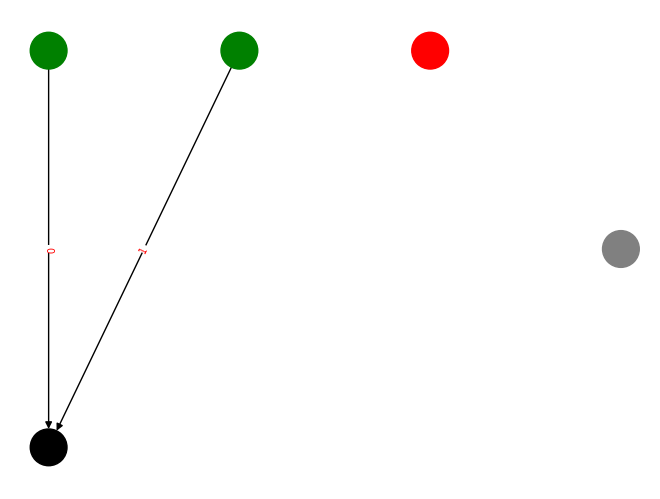

Node: 0
Node: 1
Node: 3
Node: 4
Node: 100
Connect: 0
In Node: 0
Out Node: 100
Weight: 0.76667010699659
Disabled: False

Connect: 1
In Node: 1
Out Node: 100
Weight: 0.7224778918433044
Disabled: False



In [15]:
if child is not None:
    child.plot()
    child.printsum()

In [19]:
def neat(population, POP_SIZE, GENERATIONS, MUTATE, non_mating=False):
    generations = 0
    while generations < GENERATIONS:
        for ind in population:
            fitness(ind)
        population = sorted(population, key=lambda ind: ind.fitness, reverse=True)
        max_fitness = population[0].fitness
        clear_output(wait=True)
        print("Generation: ", generations+1, " Max Fitness: ", max_fitness)
        
        if max_fitness > -0.01:
            return population[0]
        
        new_population = population[:int(POP_SIZE/10)]
        children = []
        while len(children) < int(9*POP_SIZE/10):
            if non_mating:
                mut = random.choice(new_population)
                cp = Individuum.copy(mut)
                cp.mutate(MUTATE)
                children.append(cp)
            else:
                random.shuffle(new_population)
                mom = new_population.pop()
                dad = new_population.pop()
                child = mom.crossover(dad)
                if child is not None:
                    child.mutate(MUTATE)
                    children.append(child)
                else:
                    child = Individuum.copy(mom)
                    child.mutate(MUTATE)
                    children.append(child)
                new_population.append(mom)
                new_population.append(dad)

        population = new_population + children
        generations += 1
    return population[0]

In [20]:
POP_SIZE = 100
GENERATIONS = 500
MUTATE = {
    'weight': {
        'rate': 0.9,
        'reset': 0.3
    },
    'connection': 0.2,
    'node': 0.1
}

In [27]:
reset_markings()
random.seed(0)
population = [simplest_ind(2, 1, bias=True)]
for i in range(POP_SIZE-1):
    population.append(Individuum.copy(population[0]))

winner = neat(population, POP_SIZE, GENERATIONS, MUTATE, non_mating=False)

Generation:  44  Max Fitness:  [-0.00945035]


## Test über 10 Seeds (non speciated neat)

In [26]:
test = []
for i in range(10):
    reset_markings()
    random.seed(i)
    population = [simplest_ind(2, 1, bias=True)]
    for j in range(POP_SIZE-1):
        population.append(Individuum.copy(population[0]))
        population[j+1].mutate(MUTATE)

    winner = neat(population, POP_SIZE, GENERATIONS, MUTATE, non_mating=False)
    if fitness(winner) > -0.01:
        test.append(True)

with open('test.txt', 'w') as f:
    f.write(str(test))

Generation:  500  Max Fitness:  [-1.]


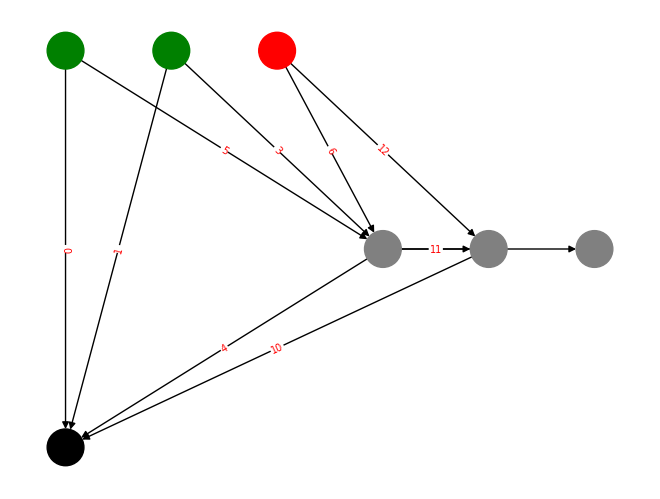

In [28]:
winner.plot()
#winner.printsum()

In [38]:
for i in inp:
    print(i, winner.forward(i))

[0 0] [0.04269517]
[0 1] [0.93110368]
[1 0] [0.69899824]
[1 1] [0.02017823]


# Full Neat

In [31]:
def speciation(population, DT, c1,c2,c3):
    speciated = []
    cont = False
    for ind in population:
        for species in speciated:
            if ind in species:
                cont = True
                break
        if cont:
            cont = False
            continue
        for species in speciated:
            if species[0].distance(ind,c1,c2,c3) < DT:
                species.append(ind)
                cont = True
                break
        if cont:
            cont = False
            continue
        speciated.append([ind])
    return speciated

In [41]:
def neat(population, GENERATIONS, MUTATE_BIG, MUTATE_SMALL, DT, MATING_RATE, c1,c2,c3,brake_fitness, fit_fn: callable):
    generations = 0

    mfit = []
    while generations < GENERATIONS:
        speciated = speciation(population, DT, c1, c2, c3)
        solved = False
        max_fitness = 0
        which = []
        for species in speciated:
            for ind in species:
                f = fit_fn(ind)
                solved |= f >= brake_fitness
                max_fitness = max(max_fitness, f)
                if solved:
                    which.append((ind, f))
                ind.fitness /= len(species)
        mfit.append(max_fitness)
        clear_output(wait=True)
        print("Generation: ", generations+1, " Max Fitness: ", max_fitness, "Num Species: ", len(speciated))
        if solved:
            return sorted(which, key=lambda ind: ind[1], reverse=True)[0][0]
        new_population = []
        for species in speciated:
            species.sort(key=lambda ind: ind.fitness, reverse=True)
            l = len(species)
            if l >= 5:
                new_population.append(Individuum.copy(species[0]))
            l1 = int(0.25*l)
            l2 = l - l1
            for i in range(l1):
                cp = Individuum.copy(species[i])
                if len(species) >= 5:
                    cp.mutate(MUTATE_BIG)
                else:
                    cp.mutate(MUTATE_SMALL)
                new_population.append(cp)
            for i in range(l2):
                if random.random() < MATING_RATE and len(species) >= 2:
                    mom = species.pop()
                    dad = species.pop()
                    child = mom.crossover(dad)
                    if child is None:
                        child = Individuum.copy(mom)
                    species.append(mom)
                    species.append(dad)
                    species.sort(key=lambda ind: ind.fitness, reverse=True)
                else:
                    s = sum([ind.fitness for ind in species])
                    child_idx = random.randint(0, l1)
                    child = Individuum.copy(species[child_idx])
                if len(species) >= 5:
                    child.mutate(MUTATE_BIG)
                else:
                    child.mutate(MUTATE_SMALL)
                new_population.append(child)
        population = new_population
        generations += 1

    for ind in population:
        fit_fn(ind)
    return sorted(population, key=lambda ind: ind.fitness, reverse=True)[0]

In [48]:
def init_population(POP_SIZE, n_inputs, n_outputs, bias=False):
    population = []
    for _ in range(POP_SIZE):
        population.append(simplest_ind(n_inputs, n_outputs, bias=bias))
    return population

In [34]:
POP_SIZE = 150
GENERATIONS = 500
DT = 3.0
C1 = 1.0
C2 = 1.0
C3 = 0.4
MATING_RATE = 0.001
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.05,
    'node': 0.03
}
MUTATE_BIG = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.3,
    'node': 0.03
}

In [42]:
inp = np.array([[0,0],[0,1],[1,0],[1,1]])
out = np.array([[0],[1],[1],[0]])

def xor_fit(ind: Individuum):
    fitness = 4
    for i,o in zip(inp,out):
        raw = ind.forward(i)
        fitness -= (raw - o) ** 2
    ind.fitness = fitness.copy()
    return fitness

In [57]:
env = gym.make('CartPole-v1')

def cartpole_fit(ind: Individuum):
    fs = []
    for _ in range(5):
        fitness = 0
        obs, _ = env.reset()
        end = False
        while not end:
            action = ind.forward(obs).round().astype(int)[0]
            obs, reward, ter, trunc, _ = env.step(action)
            fitness += reward
            end = ter and trunc
        fs.append(fitness)
    avg = sum(fs)/len(fs)
    ind.fitness = avg
    return avg

In [59]:
pop = init_population(POP_SIZE, 2, 1, bias=True)
winner = neat(pop, GENERATIONS, MUTATE_BIG, MUTATE_SMALL, DT, MATING_RATE, C1, C2, C3, 3.999, xor_fit)

Generation:  75  Max Fitness:  [3.99914268] Num Species:  5


pop = init_population(POP_SIZE, 4, 1, bias=True)
winner = neat(pop, GENERATIONS, MUTATE_BIG, MUTATE_SMALL, DT, MATING_RATE, C1, C2, C3, 150, cartpole_fit)

In [60]:
for i in inp:
    print(i, winner.forward(i))

[0 0] [0.00836344]
[0 1] [0.97446693]
[1 0] [0.9888634]
[1 1] [0.00337797]


winner.plot()
print(fitness(winner))

In [63]:
MUTATE_ON_WEIGHT = {
    'weight': {
        'rate': 0.9,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 0.0
}

In [64]:
ConnectGene.marking = 0
NodeGene.marking = 0
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_ON_WEIGHT)
dad.printsum()

mom
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.46049393340025935
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.6051764214573987
Disabled: False

dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.46049393340025935
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.6051764214573987
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.4072408544623498
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.4825346006879744
Disabled: False



In [65]:
mom.distance(dad, 1, 1, 0.4)

0.03517897994146677

In [66]:
MUTATE_DISTANCE_TEST = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 2.0,
    'node': 1.0
}

In [67]:
ConnectGene.marking = 0
NodeGene.marking = 0
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_DISTANCE_TEST)
dad.printsum()

mom
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: -0.06021508036727696
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.13237405714164874
Disabled: False

dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: -0.06021508036727696
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.13237405714164874
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Connect: 0
In Node: 0
Out Node: 2
Weight: -0.07829867839018338
Disabled: True

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.1748189895803683
Disabled: False

Connect: 2
In Node: 3
Out Node: 2
Weight: 0.2663459849033084
Disabled: False

Connect: 3
In Node: 0
Out Node: 4
Weight: 2.347149675127981
Disabled: False

Connect: 4
In Node: 4
Out Node: 2
Weight: 0.21090653428478492
Disabled: False



In [68]:
mom.distance(dad, 1, 1, 0.4)

0.6121057060923252